In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# TF version
print(tf.__version__)

2.9.2


In [17]:
# Load Fashion MNIST dataset
# Contains 70,000 grayscale images in 10 categories.
# 60,000 train images and 10,000 test images.
# The mapping between label and categories is referenced from https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

fashion_mnist = tf.keras.datasets.fashion_mnist
fashion_categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load the data using load_data() which returns tuple of NumPy arrays: (x_train, y_train), (x_test, y_test)
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

print("Number of train images : ",train_images.shape[0])
print("Number of train categories : " , np.unique(train_labels).shape[0])
print("Size of train image : {} x {}".format(train_images.shape[1],train_images.shape[2] ))

print("Number of test images : ",test_images.shape[0])
print("Number of test categories : " , np.unique(test_labels).shape[0])
print("Size of test image : {} x {}".format(test_images.shape[1],test_images.shape[2] ))


Number of train images :  60000
Number of train categories :  10
Size of train image : 28 x 28
Number of test images :  10000
Number of test categories :  10
Size of test image : 28 x 28


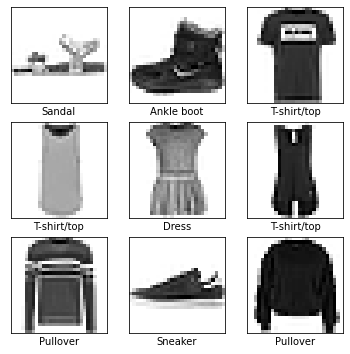

In [18]:
# Visualize the images
def visualize():
  plt.figure(figsize=(6,6))
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(fashion_categories[train_labels[i-1]])
    plt.imshow(train_images[i-1],cmap=plt.cm.binary)
visualize()

In [20]:
# Preprocessing - Normalization
# Fashion MNIST grayscale images have pixel values ranging between 0-255. 
# Scale down the values between 0-1 by diving the images with 255
train_images = train_images/255.0
test_images = test_images/255.0


In [38]:
# Build model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [40]:
# Compile the model
optimizer = 'adam'
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics=['accuracy']

model.compile(optimizer=optimizer ,loss=loss , metrics=metrics)

In [42]:
# Train model
model.fit(x=train_images,y=train_labels,epochs=20)
model.summary()

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6530 - accuracy: 0.7646
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5745 - accuracy: 0.7932
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5311 - accuracy: 0.8114
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5027 - accuracy: 0.8227
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4830 - accuracy: 0.8293
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4675 - accuracy: 0.8348
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4555 - accuracy: 0.8396
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4454 - accuracy: 0.8437
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4373 - accuracy: 0.8453
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.430

In [43]:
# Evaluate with test data
test_loss, test_acc = model.evaluate(x=test_images,y=test_labels)
print("Test loss : ",test_loss)
print("Test accuracy : ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4260 - accuracy: 0.8482
Test loss :  0.425950288772583
Test accuracy :  0.8482000231742859


In [44]:
# apply softmax layer on output logits to get probabilities for each claasification class
softmax_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

logit_predictions = model.predict(test_images)
probability_predictions = softmax_model.predict(test_images)

print(logit_predictions[0])
print(probability_predictions[0])

313/313 [==============================] - 1s 2ms/step
[ -9.872498  -12.592153   -7.881488   -7.916373   -6.5245957   3.543224
  -7.1451015   3.2065146  -0.1741093   5.0777273]
[2.33869741e-07 1.54114268e-08 1.71261036e-06 1.65389531e-06
 6.65195194e-06 1.56800658e-01 3.57657291e-06 1.11973904e-01
 3.81004787e-03 7.27401495e-01]


In [50]:
# get the predictions with max probability
max_preds = np.argmax(probability_predictions,axis=1)

print(max_preds[0]," = ",fashion_categories[max_preds[0]])

9  =  Ankle boot


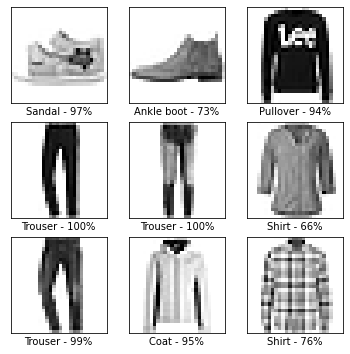

In [57]:
# Display results for first 9 test images
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1) 
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(fashion_categories[max_preds[i-1]]+" - "+'{:2.0f}%'.format(probability_predictions[i-1,max_preds[i-1]]*100))
    plt.imshow(test_images[i-1],cmap=plt.cm.binary)